# Trabalho 02 Unidade 03
### Discente: Ailson Forte dos Santos

## Descrição:
Realizar um estudo com diferentes configurações de redundância (TMR, 5MR, paralela com 2,3,4 dispositivos), valores de lambda. Identificar no estudo os valores temporais que a partir deles não se justifica o uso de redundância. Para cada cenário traçar linhas verticais indicando o MTTF de cada modelo de redundância. 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def relaibility_exp(l, t):
    return math.e**(-(l*t))

In [3]:
def relaibility_hypoexp(l1, l2, t):
    return ((l2/(l2-l1))*(math.e**(-(l1*t)))) - ((l1/(l2-l1))*(math.e**(-(l2*t))))

In [4]:
def combination(n, p):
    return math.factorial(n)/(math.factorial(n-p)*math.factorial(p))

In [5]:
def TMR(R, n):
    tmr = [combination(n,i)*(R**i)*((1-R)**(n-i)) for i in range(2,n+1)]
    return np.sum(tmr)

In [11]:
def plot_relaiabilities(l1, l2):
    ## Calculo dos pontos a serem plotados
    rng = 152
    T = [t/100.0 for t in range(rng)]
    R_l1 = [relaibility_exp(l1, t) for t in T]
    R_l2 = [relaibility_exp(l2, t) for t in T]
    R_hypo = [relaibility_hypoexp(l1, l2, t) for t in T]
    R_TMR = [TMR(r,3) for r in R_hypo]
    R_5MR = [TMR(r,5) for r in R_hypo]
    R_2_disps_l1 = [1 - ((1-r)**2) for r in R_l1]
    R_3_disps_l1 = [1 - ((1-r)**3) for r in R_l1]
    R_4_disps_l1 = [1 - ((1-r)**4) for r in R_l1]
    R_2_disps_l2 = [1 - ((1-r)**2) for r in R_l2]
    R_3_disps_l2 = [1 - ((1-r)**3) for r in R_l2]
    R_4_disps_l2 = [1 - ((1-r)**4) for r in R_l2]
    mttf_R_l1 = [1 - np.mean(R_l1) for t in T]
    mttf_R_l2 = [1 - np.mean(R_l2) for t in T]
    mttf_R_hypo = [1 - np.mean(R_hypo) for t in T]
    mttf_R_TMR = [1 - np.mean(R_TMR) for t in T]
    mttf_R_5MR = [1 - np.mean(R_5MR) for t in T]
    mttf_R_2d_l1 = [1 - np.mean(R_2_disps_l1) for t in T]
    mttf_R_3d_l1 = [1 - np.mean(R_3_disps_l1) for t in T]
    mttf_R_4d_l1 = [1 - np.mean(R_4_disps_l1) for t in T]
    mttf_R_2d_l2 = [1 - np.mean(R_2_disps_l2) for t in T]
    mttf_R_3d_l2 = [1 - np.mean(R_3_disps_l2) for t in T]
    mttf_R_4d_l2 = [1 - np.mean(R_4_disps_l2) for t in T]
    mttf_y = [i/150 for i in range(rng)]

    sns.set()
    
    fig,((ax1,ax2,ax3)) = plt.subplots(3,1,figsize=(12,36))
    
    ax1.plot(T,R_hypo,label='Hypoexponential Realiability')
    ax1.plot(mttf_R_hypo,mttf_y,label='MTTF Hypoexponential')
    
    ax1.plot(T,R_TMR,label='TMR')
    ax1.plot(mttf_R_TMR,mttf_y,label='MTTF TMR lambda')
    
    ax1.plot(T,R_5MR,label='5MR')
    ax1.plot(mttf_R_5MR,mttf_y,label='MTTF 5MR lambda')
    
    ax1.plot([mttf_R_hypo[0]],[i for i in range(rng) if R_hypo[i] == R_TMR[i]],'D', label='MTTF L~Hypo x R TMR')
    
    ax2.plot(T,R_l1,label='Realiability lambda = ' + str(l1))
    ax2.plot(mttf_R_l1,mttf_y,label='MTTF lambda = ' + str(l1))   
    
    ax2.plot(T,R_2_disps_l1,label='Parallel 2 disps. ' + 'lambda = ' + str(l1))
    ax2.plot(mttf_R_2d_l1,mttf_y,label='MTTF 2 disps. lambda = ' + str(l1))
    
    ax2.plot(T,R_3_disps_l1,label='Parallel 3 disps. ' + 'lambda = ' + str(l1))
    ax2.plot(mttf_R_3d_l1,mttf_y,label='MTTF 3 disps. lambda = ' + str(l1))
    
    ax2.plot(T,R_4_disps_l1,label='Parallel 4 disps. ' + 'lambda = ' + str(l1))
    ax2.plot(mttf_R_4d_l1,mttf_y,label='MTTF 4 disps. lambda = ' + str(l1))

    ax3.plot(T,R_l2,label='Realiability lambda = ' + str(l2))
    ax3.plot(mttf_R_l2,mttf_y,label='MTTF lambda = ' + str(l2))
    
    ax3.plot(T,R_2_disps_l2,label='Parallel 2 disps. ' + 'lambda = ' + str(l2))
    ax3.plot(mttf_R_2d_l2,mttf_y,label='MTTF 2 disps. lambda = ' + str(l2))
    
    ax3.plot(T,R_3_disps_l2,label='Parallel 3 disps. ' + 'lambda = ' + str(l2))
    ax3.plot(mttf_R_3d_l2,mttf_y,label='MTTF 3 disps. lambda = ' + str(l2))
    
    ax3.plot(T,R_4_disps_l2,label='Parallel 4 disps. ' + 'lambda = ' + str(l2))
    ax3.plot(mttf_R_4d_l2,mttf_y,label='MTTF 4 disps. lambda = ' + str(l2))
    
    ax1.set_xlabel('Tempo')
    ax1.set_ylabel('Confiabilidade do sistema')
    ax1.set_title('Redundancias TMR e 5MR para lambda1 = ' + str(l1) + ', lambda2 = ' + str(l2))
    
    ax2.set_xlabel('Tempo')
    ax2.set_ylabel('Confiabilidade do sistema')
    ax2.set_title('Dispositivos em paralelo para lambda = ' + str(l1))
    
    ax3.set_xlabel('Tempo')
    ax3.set_ylabel('Confiabilidade do sistema')
    ax3.set_title('Dispositivos em paralelo para lambda = ' + str(l2))

    ax1.legend(loc=0)
    ax2.legend(loc=0)
    ax3.legend(loc=0)

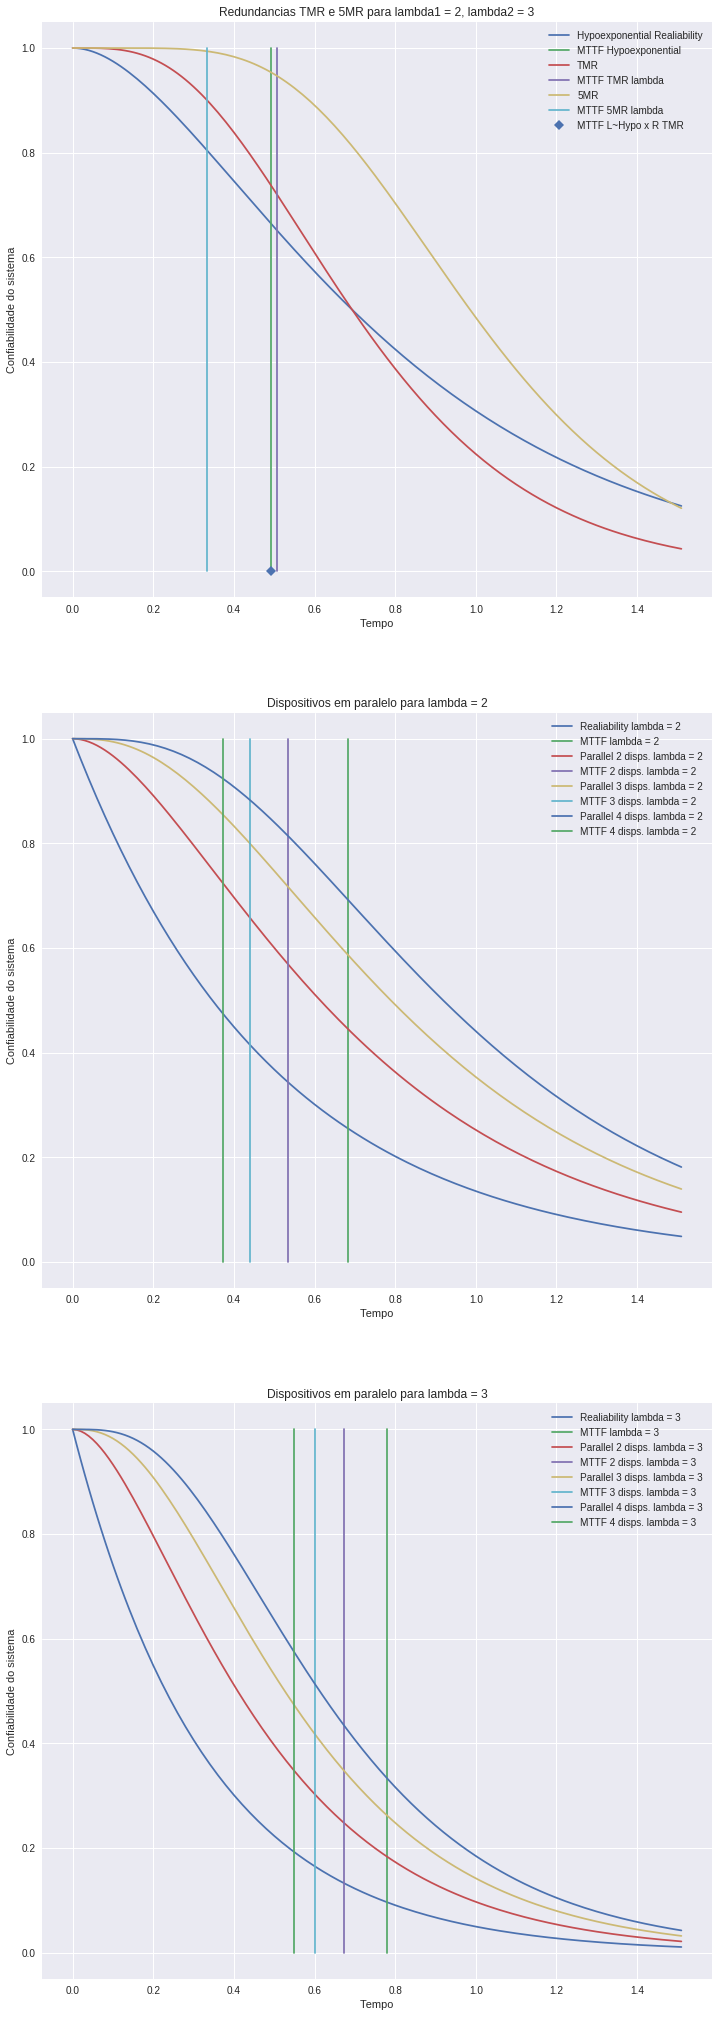

In [13]:
plot_relaiabilities(2, 3)
plt.show()